# Exemple d'analyse d'un dataset : prix des maisons à Seattle


** Exemple de régressions **

## Importations des librairies courantes

In [1]:
# Directive pour afficher les graphiques dans Jupyter (inutile si on utilise Spyder)
%matplotlib inline

In [2]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

## Lecture du fichier

On dispose des statistiques de vente des maisons du disctrict de Seattle 

<img src="http://www.communitiescount.org/uploads/images/About/rsz_regions_of_king_county_map_lightbox.jpg">

- id
- date: Date house was sold(String)
- price: Price of the sold house
- bedrooms: Numer of Bedrooms
- bathrooms: Numer of bathrooms
- sqft_living: Square footage of the living room
- sqrt_log: Square footage of the log
- floors: Total floors in the house
- waterfront: Whether the house has a view a waterfront(1: yes, 0: not)
- view: unknown
- condition: Condition of the house
- grade: unknown
- sqft_above: Square footage of house apart from basement
- sqft_basement: Square footage of the basement
- yr_built: Built year
- yr_renovated: Year when the house was renovated
- zipcode: zipcode of the house
- lat: Latitude coordinate
- long Longitude coordinate
- sqft_living15: Living room area in 2015(implies some renovations)
- sqrt_lot15: Lot area in 2015(implies some renovations)

In [3]:
#lecture du dataset
df = pd.read_csv("kc_house_data.csv")

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


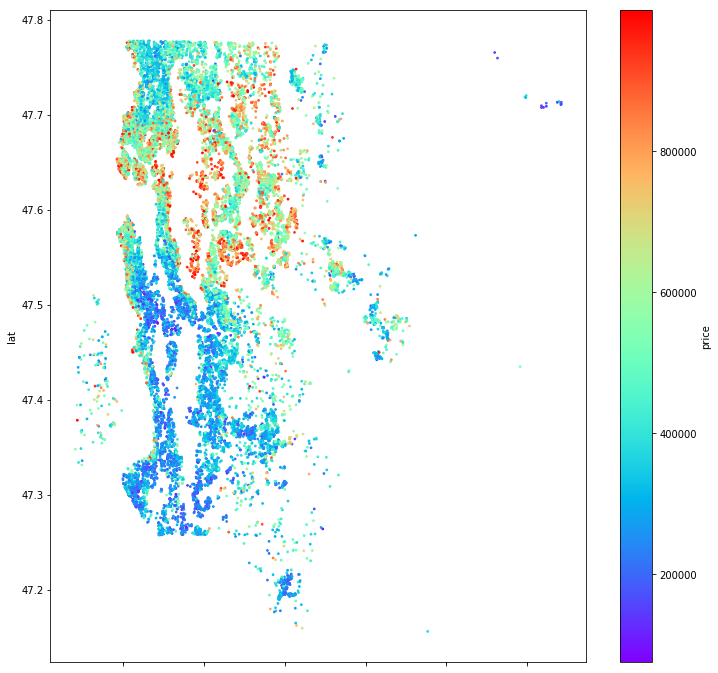

In [6]:
df[df.price<1000000].plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", s=3, figsize=(12,12))

**Exercice** : visualiser les maisons par quartiers (zipcode)  
**Exercice** : visualiser les maisons de moins de 1 million de dollars par prix. On pourra aussi faire varier la taille du point en fonction de la surface de la propriété
**Exercice** : visualiser la densité des propriétés avec *jointplot*

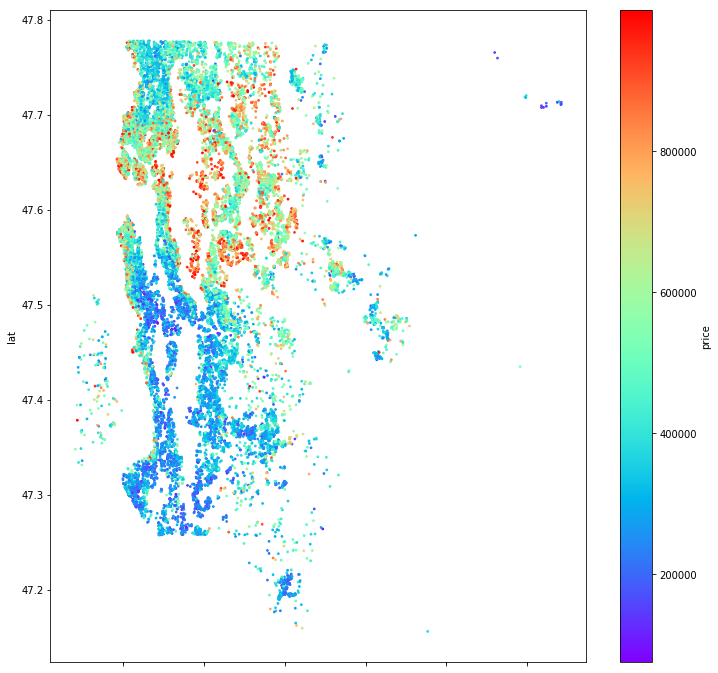

In [7]:
df[df.price < 1000000].plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", s=3, figsize=(12,12))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [10]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

On affiche un graphique montrant l'évolution du prix moyen en fonction de la date :

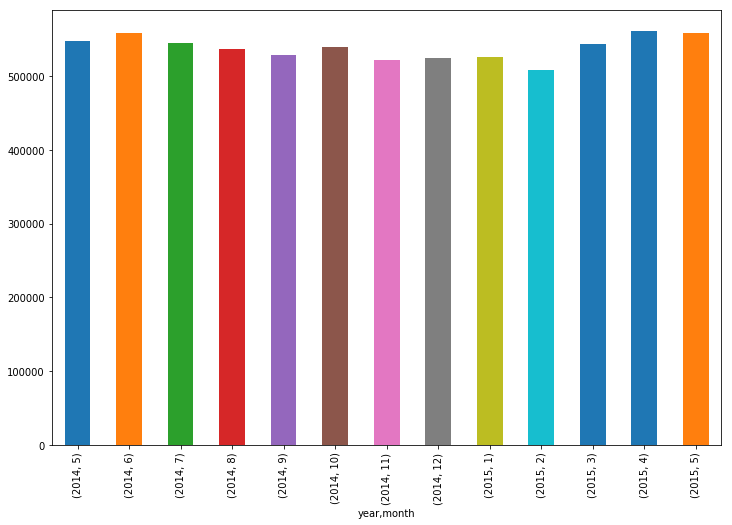

In [11]:
df.groupby(['year','month'])['price'].mean().plot(kind = 'bar', figsize=(12,8))

et le nombre de maisons vendues :

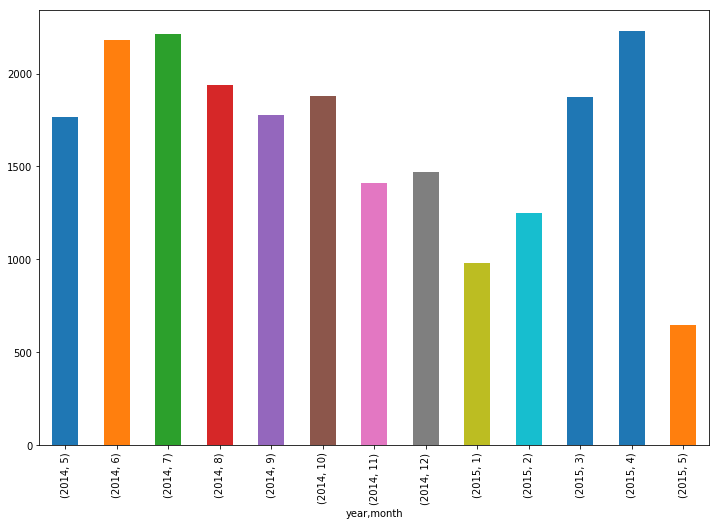

In [12]:
df.groupby(['year','month'])['price'].count().plot(kind = 'bar', figsize=(12,8))

On supprime du dataset l'identifiant id, et la date (que nous avons convertie en mois et année)

In [13]:
df = df.drop(['id','date'], axis=1)

## Recherche de corrélations

On a vu assez clairement la corrélation entre le nombre de pièces et la valeur.  
On va utiliser la fonction *corr* pour calculer systématiquement le degré de corrélation entre deux paramètres :

In [14]:
tabcorr = df.corr()     # on peut utiliser aussi bos.corr(method='pearson') par exemple

Pour visualiser l'ensemble du tableau de corrélations, on utilise une "carte de températures" (*heatmap*) :

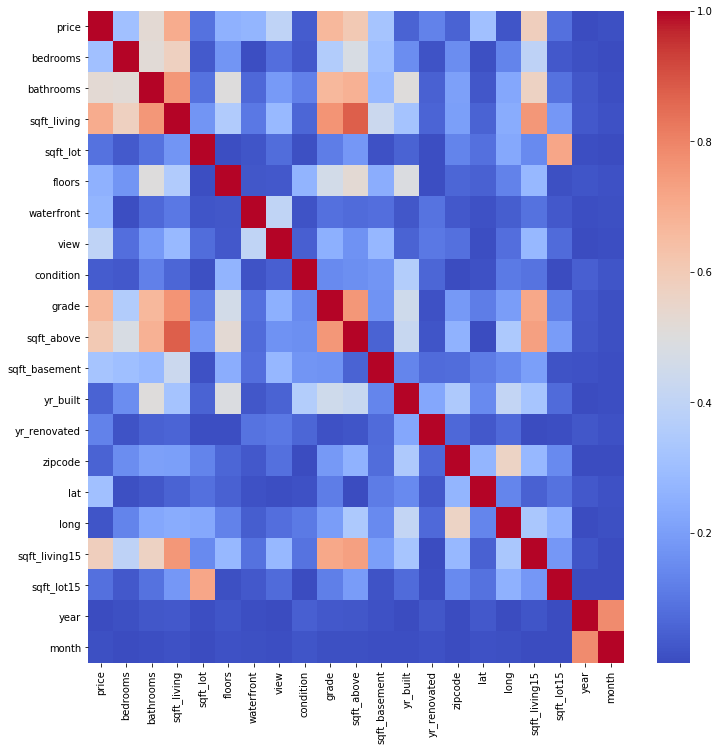

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(tabcorr), cmap="coolwarm")

On peut aussi regrouper les paramètres par *clusters* classés par proximité :

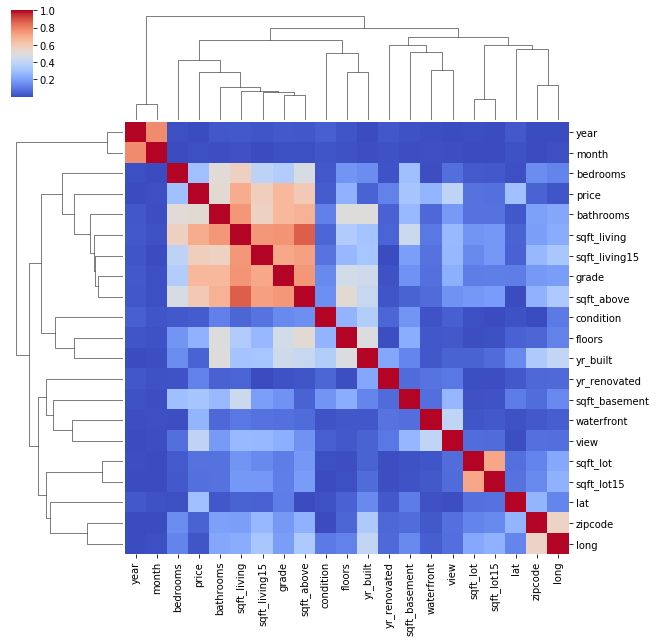

In [16]:
sns.clustermap(abs(tabcorr), cmap="coolwarm")

On peut tracer uniquement le **dendrogramme** des corrélations entre les caractéristiques. On utilise une forme "condensée" de la matrice de corrélation. *linkage* permet de calculer les distances entre caractéristiques à partir des corrélations

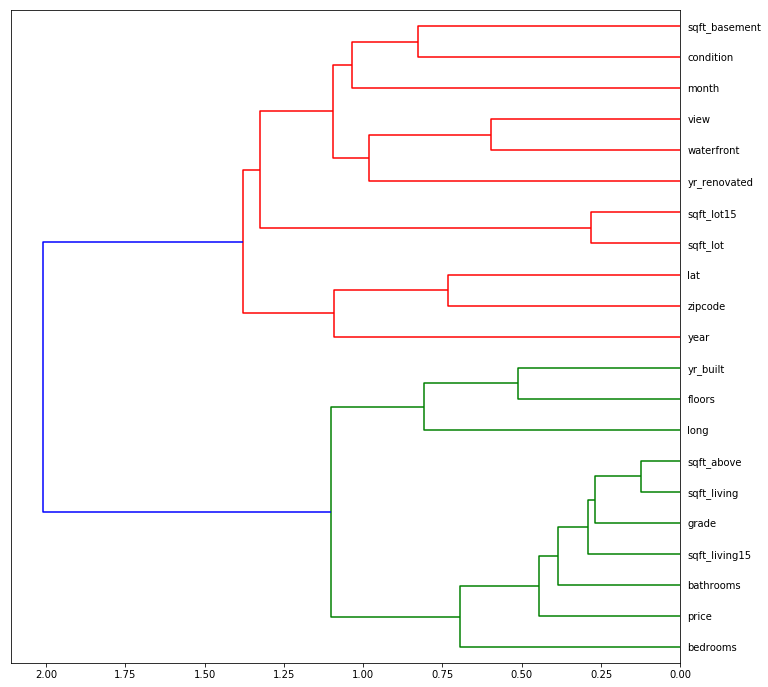

In [17]:
from scipy.cluster import hierarchy as hc

corr = 1 - df.corr()
corr_condensed = hc.distance.squareform(corr)
link = hc.linkage(corr_condensed, method='ward')
plt.figure(figsize=(12,12))
den = hc.dendrogram(link, labels=df.columns, orientation='left', leaf_font_size=10)

On s'intéresse plus précisément à la valeur des maisons :

In [18]:
correlations = tabcorr.price
print(correlations)

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
year             0.003576
month           -0.010081
Name: price, dtype: float64


On élimine la ligne MV elle-même (qui est forcément à 1) :

In [19]:
correlations = correlations.drop(['price'],axis=0)

Les corrélations fortement négatives sont aussi significatives que les positives ; on considère donc les valeurs absolues, et on trie par ordre décroissant :

In [20]:
print(abs(correlations).sort_values(ascending=False))

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
month            0.010081
year             0.003576
Name: price, dtype: float64


On voit que la plus forte corrélation concerne la surface

# Régression linéaire multiple

On sépare les caractéristiques continues et discrètes :

In [21]:
continuous_features = ['sqft_living','sqrt_log','sqft_above','sqft_basement','sqft_living15','sqrt_lot15','lat','long']
discrete_features = ['month','year','bedrooms','bathrooms','floors','waterfront','view','condition',
                     'grade','yr_built','yr_renovated','zipcode']

Pour la régression linéaire, on se limite aux maisons de moins de 1M$, et on élimine les *features* discrètes :

In [22]:
df1 = df[df.price<1000000].drop(discrete_features, axis=1)

In [23]:
X = df1.drop(['price'], axis=1)
y = df1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

On utilise la fonction de régression linéaire multiple de *sklearn* :

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)            # apprentissage
y_pred = lm.predict(X_test)         # prédiction sur l'ensemble de test

On trace le nuage de points pour comparer la prédiction et les résultats attendus :

Text(0.5,1,'Prix reels vs predictions')

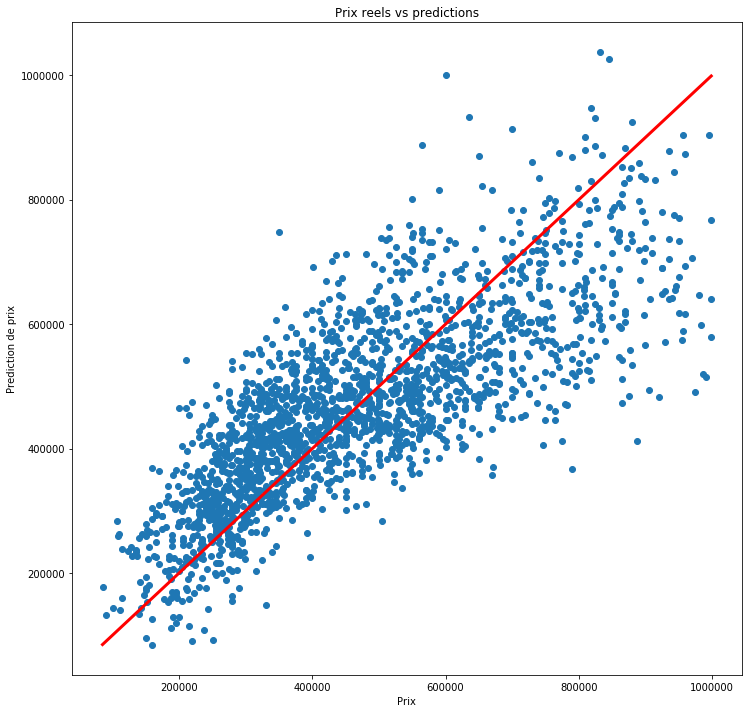

In [26]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

ou on peut visualiser la distribution de l'erreur avec *seaborn* :

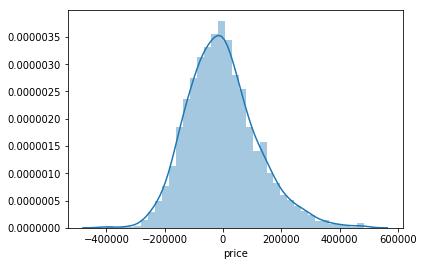

In [27]:
sns.distplot(y_test-y_pred)

On peut calculer l'erreur sur les moindres carrés :

In [28]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

120926.65258718794


Ou le *score R2* (rapport des variances estimée/réelle) :
(https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination)

In [29]:
scoreR2 = r2_score(y_test, y_pred)
print(scoreR2)

0.6090450698771468


qu'on peut écrire plus simplement :

In [30]:
lm.score(X_test,y_test)

0.6090450698771468

## Régression par forêts aléatoires

On va utiliser les forêts aléatoires pour la régression. On conserve l'ensemble des caractéristiques

In [31]:
X = df.drop(['price'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [32]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(rf.score(X_test,y_test))

0.8647712364641755


Text(0.5,1,'Prix reels vs predictions')

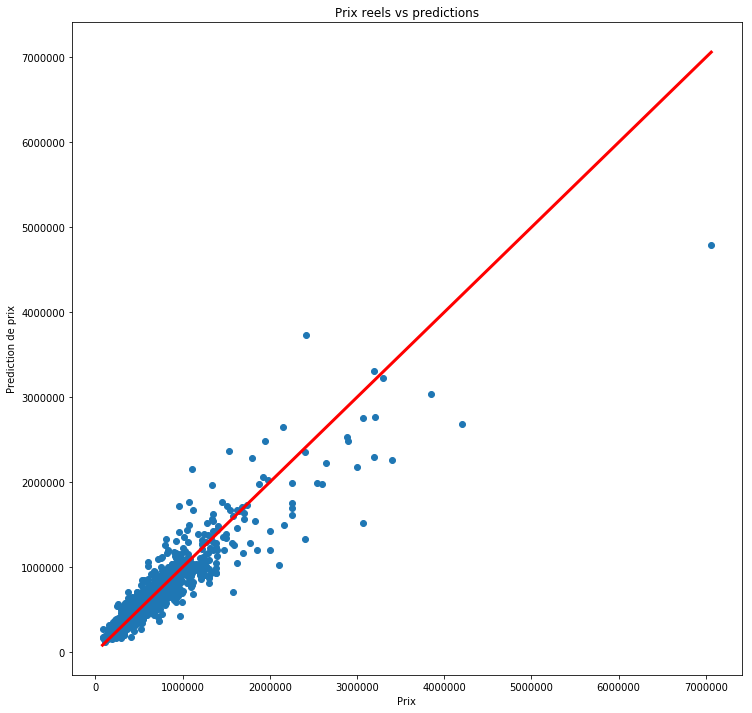

In [33]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_rf)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

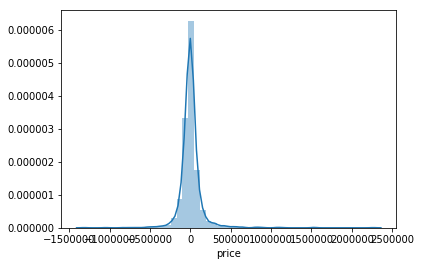

In [34]:
sns.distplot(y_test-y_rf)

In [35]:
print(np.sqrt(mean_squared_error(y_test, y_rf)))

147280.04882407977
